In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
combined_df = pd.merge(ride_df, city_df, how='inner', on=['city', 'city'])
# Display the data table for preview
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

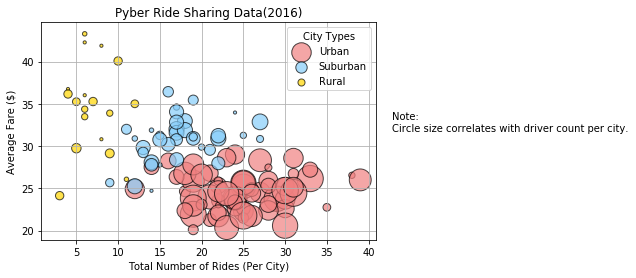

In [2]:
# Obtain the x and y coordinates for each of the three city types
urban_df = combined_df[combined_df.type == "Urban"]
suburban_df = combined_df[combined_df.type == "Suburban"]
rural_df = combined_df[combined_df.type == "Rural"]

urban_avgFare = urban_df.groupby(['city'])['fare'].mean()
urban_totalNumberOfRides = urban_df.groupby(['city'])['ride_id'].count()
urban_driverCount = urban_df.groupby(['city'])['driver_count'].first()
suburban_avgFare = suburban_df.groupby(['city'])['fare'].mean()
suburban_totalNumberOfRides = suburban_df.groupby(['city'])['ride_id'].count()
suburban_driverCount = suburban_df.groupby(['city'])['driver_count'].first()
rural_avgFare = rural_df.groupby(['city'])['fare'].mean()
rural_totalNumberOfRides = rural_df.groupby(['city'])['ride_id'].count()
rural_driverCount = rural_df.groupby(['city'])['driver_count'].first()

urban_df = pd.DataFrame({'Average Fares': urban_avgFare,
                       'Total Rides': urban_totalNumberOfRides,
                       'Driver Count': urban_driverCount})
suburban_df = pd.DataFrame({'Average Fares': suburban_avgFare,
                       'Total Rides': suburban_totalNumberOfRides,
                       'Driver Count': suburban_driverCount})
rural_df = pd.DataFrame({'Average Fares': rural_avgFare,
                       'Total Rides': rural_totalNumberOfRides,
                       'Driver Count': rural_driverCount})

# Build the scatter plots for each city types
ax = urban_df.plot(kind="scatter", x="Total Rides", y="Average Fares", alpha=0.7,
             label="Urban", c="LightCoral", edgecolors="black", s=urban_df["Driver Count"]*10)

suburban_df.plot(kind="scatter", x="Total Rides", y="Average Fares", alpha=0.7,
             label="Suburban", c="LightSkyBlue", edgecolors="black", s=suburban_df["Driver Count"]*10, ax=ax)

rural_df.plot(kind="scatter", x="Total Rides", y="Average Fares", alpha=0.7,
             label="Rural", c="Gold", edgecolors="black", s=rural_df["Driver Count"]*10, ax=ax)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()
# Create a legend
plt.legend(loc="best", title="City Types")
# Incorporate a text label regarding circle size
plt.text(1.05, 0.5,"Note:\nCircle size correlates with driver count per city.", transform=ax.transAxes)

# Save Figure
plt.savefig("plots/Pyber_Ride_Sharing_Data_2016.png")

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

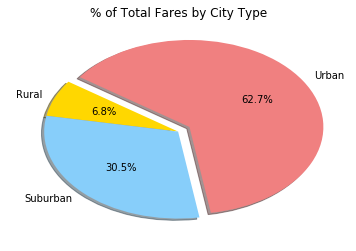

In [4]:
# Calculate Type Percents
total_fare_df = combined_df.groupby(["type"]).sum()["fare"]
colors = ["Gold", "LightSkyBlue", "LightCoral"]
explode = (0, 0, 0.1)

# Build Pie Chart
plt.pie(total_fare_df, labels=total_fare_df.index.values, colors=colors, explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=145)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("plots/Total_Fares_by_City_Type.png")

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

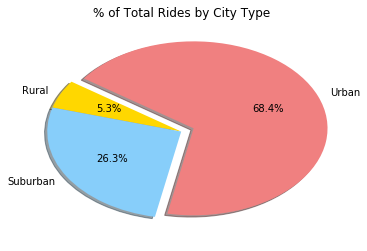

In [6]:
# Calculate Ride Percents
total_rides_df = combined_df.groupby(["type"]).count()["ride_id"]
colors = ["Gold", "LightSkyBlue", "LightCoral"]
explode = (0, 0, 0.1)

# Build Pie Chart
plt.pie(total_rides_df, labels=total_rides_df.index.values, colors=colors, explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=145)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("plots/Total_Rides_by_City_Type.png")

In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

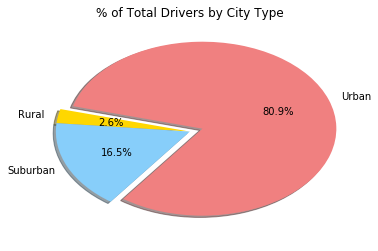

In [8]:
# Calculate Driver Percents
total_driver_df = city_df.groupby(["type"]).sum()["driver_count"]
colors = ["Gold", "LightSkyBlue", "LightCoral"]
explode = (0, 0, 0.1)

# Build Pie Chart
plt.pie(total_driver_df, labels=total_driver_df.index.values, colors=colors, explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("plots/Total_Drivers_by_City_Type.png")

In [9]:
# Show Figure
plt.show()